In [1]:
import pandas as pd

In [2]:
# cryptocurrency data
df = pd.read_csv('ETH_1h.csv')

# IF WE WANT TO CONVERT ALL DATE COL'S VAL.S TO DATETIME 
# WHILE READING NOT AFTER:

# creating a func that converts each gotten string to datetime
# d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %I-%p')

# df = pd.read_csv('ETH_1h.csv', parse_dates=['Date'], date_parser=d_parser)
# ^ the 3 rd arg is a func that converts each string to datetime

df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [3]:
df.shape

(14078, 7)

In [4]:
df.loc[0, 'Date']

'2020-03-13 08-PM'

In [5]:
# Weekday that the day fell on 
df.loc[0, 'Date'].day_name()

AttributeError: 'str' object has no attribute 'day_name'

# Converting str to datetime

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
# ^ gives an error coz that does not know the formatting of the given data
# Sol: 
# ->pass in a format string specifying how dates are
#     -formatted so that it can parse this correctly

ParserError: Unknown string format: 2020-03-13 08-PM

In [21]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d %I-%p")
# format is telling how to parse a date

In [22]:
df['Date']

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
14073   2018-08-05 11:00:00
14074   2018-08-05 10:00:00
14075   2018-08-05 09:00:00
14076   2018-08-05 08:00:00
14077   2018-08-05 07:00:00
Name: Date, Length: 14078, dtype: datetime64[ns]

# What day that date fell on?

In [23]:
df.loc[0, 'Date'].day_name()

'Friday'

In [24]:
# when using the day_name() for the entire dframe, 
# we need to access the dt class on the series obj similar str class
df['Date'].dt.day_name()

0        Friday
1        Friday
2        Friday
3        Friday
4        Friday
          ...  
14073    Sunday
14074    Sunday
14075    Sunday
14076    Sunday
14077    Sunday
Name: Date, Length: 14078, dtype: object

In [25]:
df['DayOfWeek'] = df['Date'].dt.day_name()
df

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
14073,2018-08-05 11:00:00,ETHUSD,406.93,407.16,406.09,406.76,128899.33,Sunday
14074,2018-08-05 10:00:00,ETHUSD,408.34,408.62,406.92,406.93,216329.74,Sunday
14075,2018-08-05 09:00:00,ETHUSD,405.24,409.00,405.23,408.34,484104.39,Sunday
14076,2018-08-05 08:00:00,ETHUSD,402.89,406.09,402.89,405.24,115555.94,Sunday


In [26]:
# Viewing the earliest day
df['Date'].min()

Timestamp('2018-08-05 07:00:00')

In [27]:
# Viewing the latest day
df['Date'].max()

Timestamp('2020-03-13 20:00:00')

# Getting a timedelta btwn 2 dates

In [28]:
# Viewing the time btwn 2 dates
df['Date'].max() - df['Date'].min()

Timedelta('586 days 13:00:00')

# Filtering

In [29]:
filt = (df['Date'] >= '2019') & (df['Date'] < '2020')
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


# Filtering alternative: specified

In [30]:
filt = (df['Date'] >= pd.to_datetime('2019-01-01')) & (df['Date'] < pd.to_datetime('2020-01-01'))
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


# Setting the dates as the index

In [31]:
df.set_index('Date', inplace=True)

In [32]:
df

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2018-08-05 11:00:00,ETHUSD,406.93,407.16,406.09,406.76,128899.33,Sunday
2018-08-05 10:00:00,ETHUSD,408.34,408.62,406.92,406.93,216329.74,Sunday
2018-08-05 09:00:00,ETHUSD,405.24,409.00,405.23,408.34,484104.39,Sunday


In [33]:
df.loc['2019']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


# Slicing

In [43]:
df['2019-12-31 22:00:00':'2020-02-29 23:00:00']
# in the slicing, the 1st one has to be 1hour before coz that's added  

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
...,...,...,...,...,...,...,...
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday
2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40,Wednesday


In [33]:
df['2019-12-31':'2020-02-29 23:00:00']['Close'].mean()

195.1655902777778

In [34]:
df.loc['2020-01-01']['High'].max()

132.68

# Resampling

In [45]:
highs = df['High'].resample('D').max()
# D -> resampling into Days. Example: could be 2D, 3D, ...
# W -> week
highs['2020-01-01']

132.68

# Plotting via matplotlib

In [36]:
%matplotlib inline
# ^ we first need to use this special line within 
# jupiter notebooks that allows our plots to display within the browser

<AxesSubplot:xlabel='Date'>

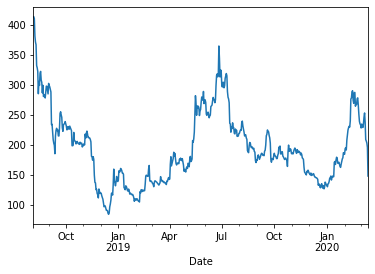

In [46]:
highs.plot()

# Resampling multiple columns and using some func 
# BUT: this is rare

In [38]:
df.resample('W').mean()
# ^ could be used for resampling and using the same aggregation method for 
# -everything
# BUT WE ARE NOT INTENDING THAT NOW !!!

,Open,High,Low,Close,Volume
Date,,,,,
2018-08-05,406.774706,408.136471,405.541176,406.983529,4.128515e+05
2018-08-12,362.369345,363.954940,359.674524,361.829583,1.416039e+06
2018-08-19,292.503036,295.293512,289.705298,292.395179,2.162742e+06
2018-08-26,278.956071,280.383571,277.210774,278.802619,9.561947e+05
2018-09-02,286.105357,287.483333,284.846845,286.229226,7.441938e+05
...,...,...,...,...,...
2020-02-16,255.021667,257.255238,252.679762,255.198452,2.329087e+06
2020-02-23,265.220833,267.263690,262.948512,265.321905,1.826094e+06
2020-03-01,236.720536,238.697500,234.208750,236.373988,2.198762e+06


# Resampling multiple columns and using different func.s using agg()
<p>the 'agg' method also accepts a map of columns and the aggregation functions that we want to run on that column </p>

In [39]:
df.resample('W').agg({'Close':'mean', 'High':'max', 'Low':'min', 'Volume':'sum'})
# key - column
# value - func.s

,Close,High,Low,Volume
Date,,,,
2018-08-05,406.983529,413.33,402.14,7.018476e+06
2018-08-12,361.829583,413.17,305.14,2.378945e+08
2018-08-19,292.395179,322.27,250.28,3.633407e+08
2018-08-26,278.802619,304.00,259.11,1.606407e+08
2018-09-02,286.229226,302.20,271.32,1.250246e+08
...,...,...,...,...
2020-02-16,255.198452,290.00,216.31,3.912867e+08
2020-02-23,265.321905,287.13,242.36,3.067838e+08
2020-03-01,236.373988,278.13,209.26,3.693920e+08
